<center><h1><span style="color: green;">THỰC HÀNH BUỔI 5</span></h1></center>

# PHÂN TÍCH THÀNH PHẦN CHÍNH (PRINCIPAL COMPONENTS ANALYSIS - PCA)

## Ví dụ 1

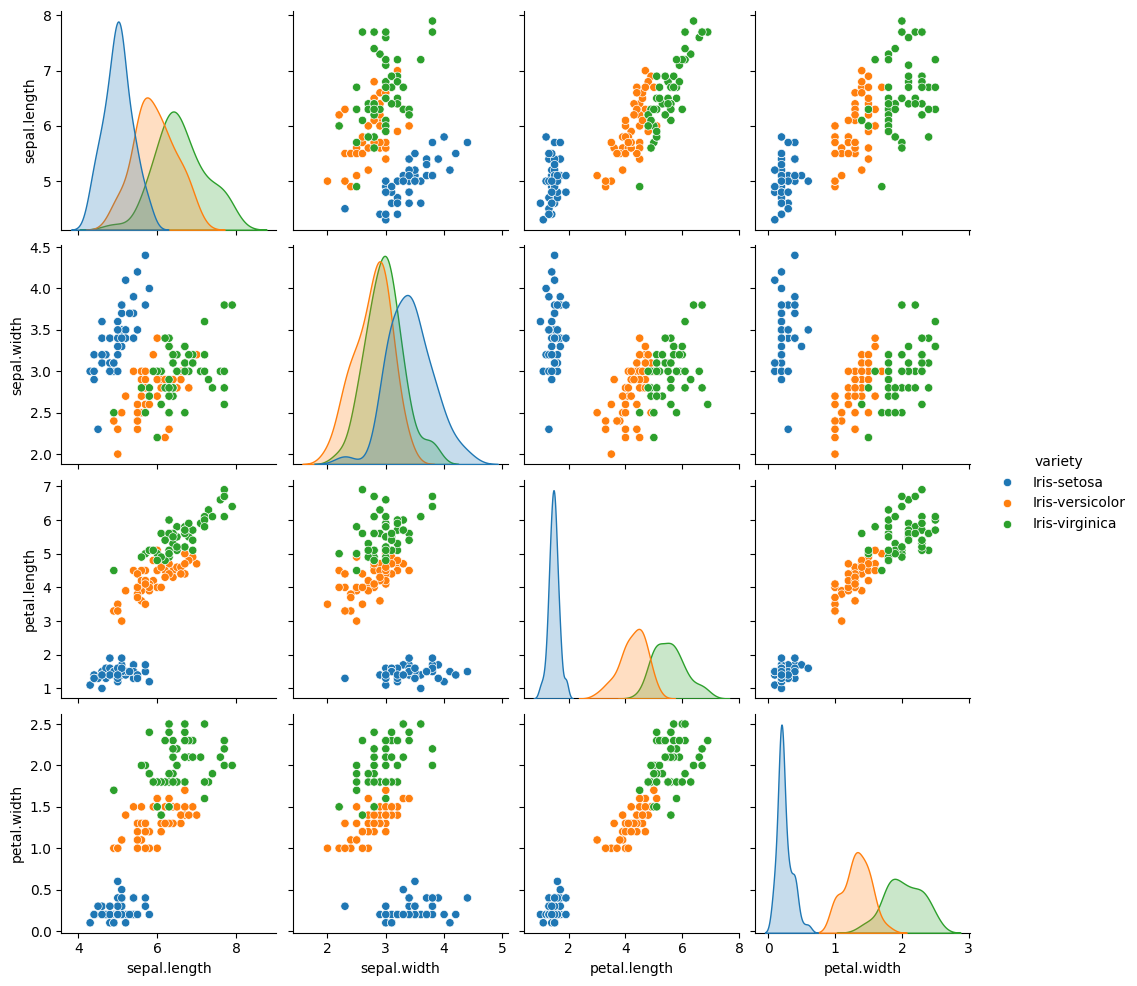

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Read csv data file, change to your location
df = pd.read_csv("Iris.csv")

# show data information
sns.pairplot(df, hue='variety')

Text(0.5, 1.0, 'Correlation matrix')

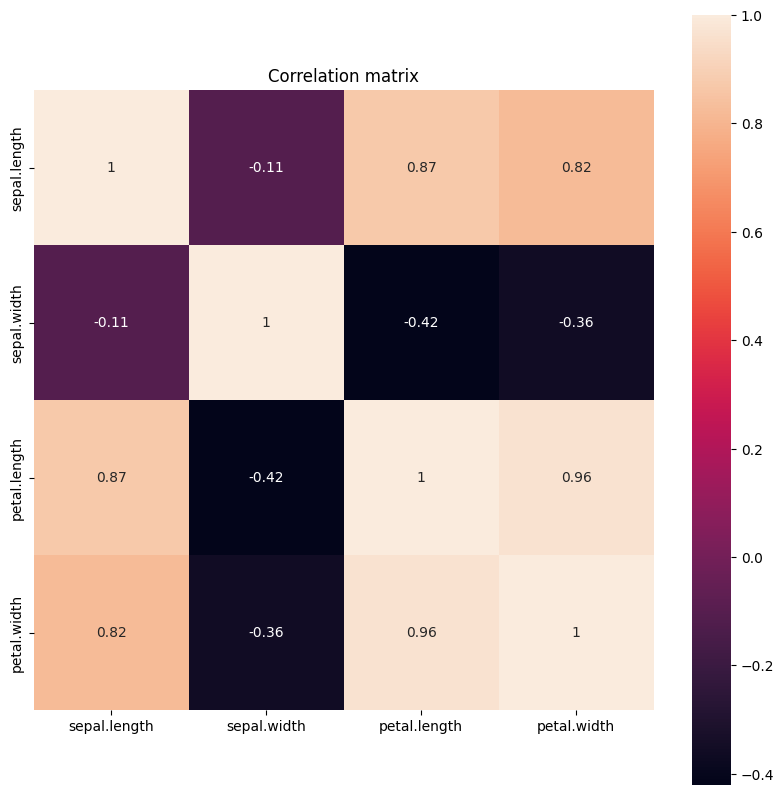

In [17]:
# We're seperating the species column
species = df["variety"].tolist()
X = df.drop(columns = "variety")

# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

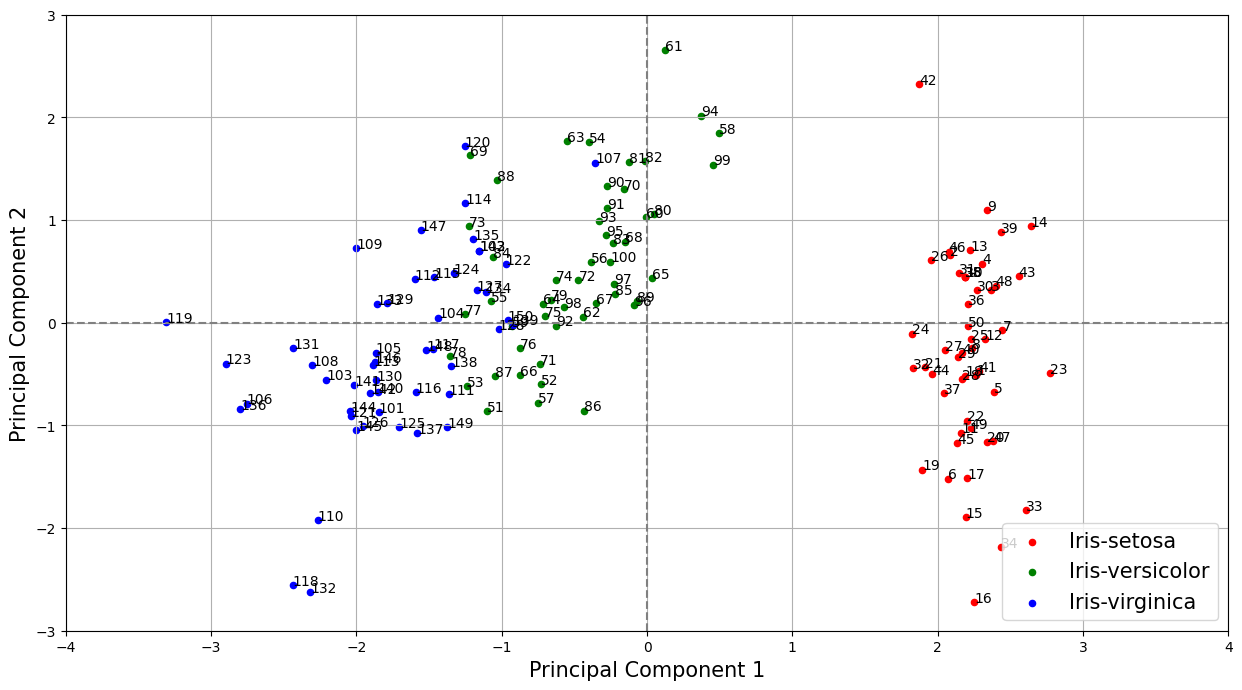

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- Requirement a: Train-Test Split and Logistic Regression ---
# Convert species to numerical labels (0, 1, 2 for the three classes)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(species)

# Split the data into training and testing sets (4:1 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression on test set: {accuracy:.2f}")


Accuracy of Logistic Regression on test set: 0.93



SVD Eigenvalues: [2.91081808 0.92122093 0.14735328 0.02060771]
SVD Eigenvectors (first few): [[-0.52237162 -0.37231836  0.72101681]
 [ 0.26335492 -0.92555649 -0.24203288]
 [-0.58125401 -0.02109478 -0.14089226]
 [-0.56561105 -0.06541577 -0.6338014 ]]

Eigenvalue Decomposition Eigenvalues: [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvalue Decomposition Eigenvectors (first few): [[ 0.52237162 -0.37231836 -0.72101681]
 [-0.26335492 -0.92555649  0.24203288]
 [ 0.58125401 -0.02109478  0.14089226]
 [ 0.56561105 -0.06541577  0.6338014 ]]


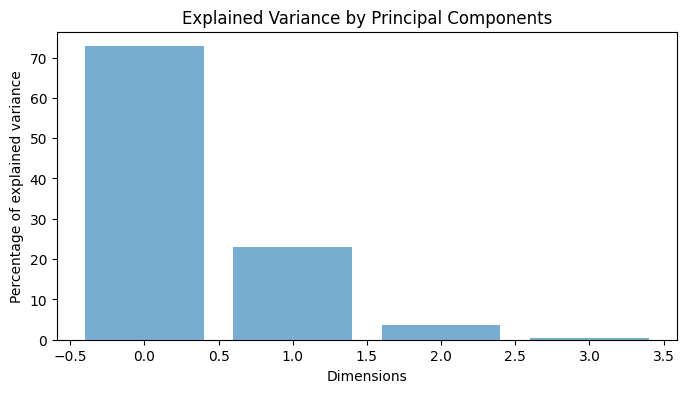

In [27]:
# --- Requirement b: PCA using two methods ---

# Method 1: SVD
u, s, v = np.linalg.svd(X_corr)
eig_values_svd, eig_vectors_svd = s, u
print("\nSVD Eigenvalues:", eig_values_svd)
print("SVD Eigenvectors (first few):", eig_vectors_svd[:, :3])  # Show first 3 for brevity

# Method 2: Eigenvalue Decomposition
eig_vectors, eig_vectors = np.linalg.eig(X_corr)
print("\nEigenvalue Decomposition Eigenvalues:", eig_vectors)
print("Eigenvalue Decomposition Eigenvectors (first few):", eig_vectors[:, :3])  # Show first 3 for brevity

# Plotting the variance explained by each PC (using SVD eigenvalues)
explained_variance = (eig_values_svd / np.sum(eig_values_svd)) * 100
plt.figure(figsize=(8, 4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')
plt.title('Explained Variance by Principal Components')
plt.show()

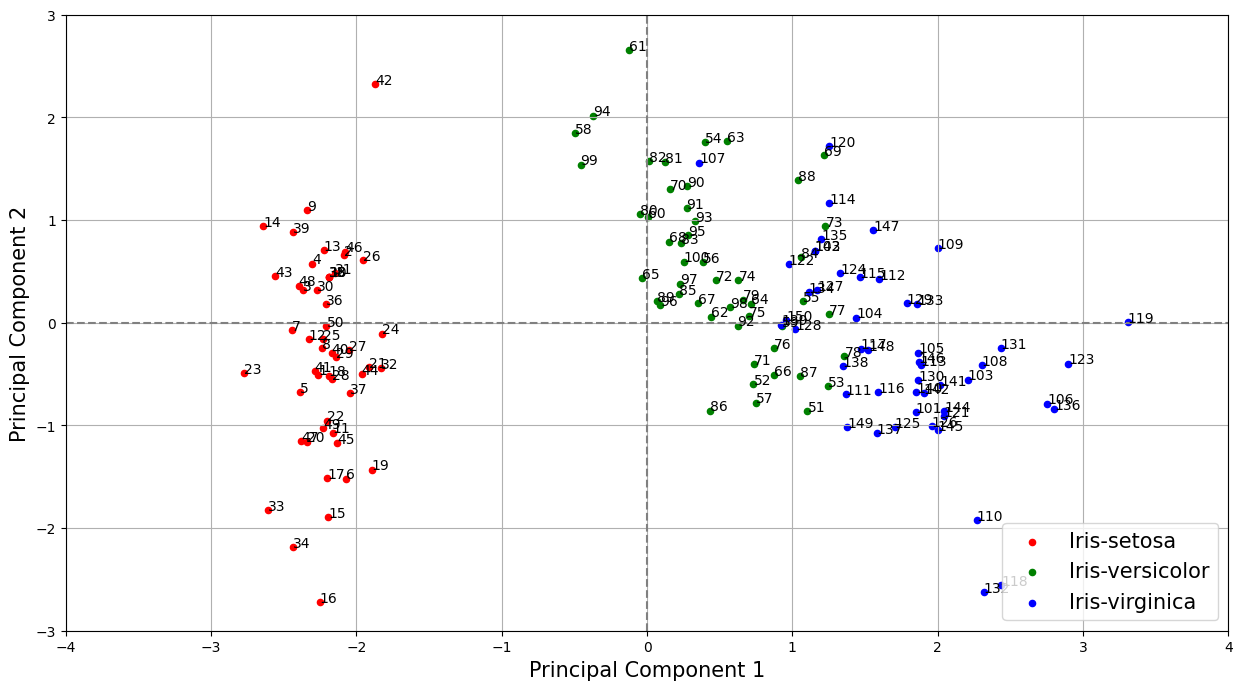

In [26]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))

    species_unique = list(set(species))
    species_colors = ["r","b","g"]

    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))

    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()

plot_scatter(pc1, pc2)

## Ví dụ 2 (Bài tập thực hành 1):

In [74]:
# Import các thư viện cần thiếtthiết
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [75]:
# In ra số lượng các mẫu ứng vối mỗi class
df= pd.read_csv("pd_speech_features.csv")
df.head()
df['class'].value_counts()
# sns.pairplot(df, hue='class')

class
1    564
0    192
Name: count, dtype: int64

### _(1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu_. 

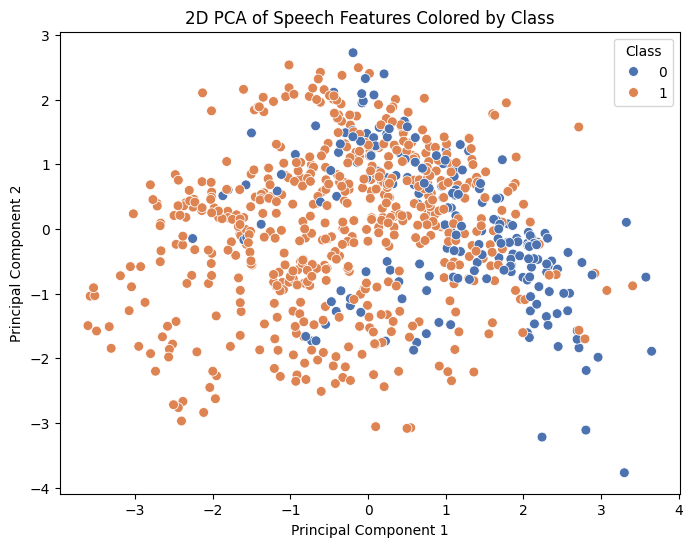


Explained variance ratio by each component: [0.18756015 0.12677269]
Total explained variance ratio: 0.3143328437205697


In [76]:
# We're separating the class column
species = df["class"].tolist()
X = df.drop(columns=["class", "id"])  # Drop both 'class' and 'id' columns

# Standardize the data (using z-score standardization)
X = (X - X.mean()) / X.std(ddof=0)

# Normalize data (min-max normalization)
X_norm = (X - X.min()) / (X.max() - X.min())

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)  # 2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

# Add the class labels to the transformed data for visualization
transformed['class'] = species

# Visualize the relationship between classes in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=transformed, x=0, y=1, hue='class', palette='deep', s=50)
plt.title('2D PCA of Speech Features Colored by Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()

# Optional: Print the explained variance ratio to see how much variance is captured by the two components
print("\nExplained variance ratio by each component:", pca.explained_variance_ratio_)
print("Total explained variance ratio:", sum(pca.explained_variance_ratio_))

### _(2) Giảm số chiều xuống còn 200 ứng với thành phần chính của dữ liệu bằng PCA nhằm phục vụ cho việc phân loại dữ liệu (theo class), với phần dữ liệu Train gồm 500 bản ghi và dữ liệu kiểm tra là phần còn lại. Dùng các công cụ đo độ chính xác để kiểm tra đánh giá mô hình._


Training set size: 500 records
Test set size: 256 records

Model Evaluation:
Accuracy Score: 0.85546875

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67        65
           1       0.87      0.95      0.91       191

    accuracy                           0.86       256
   macro avg       0.84      0.76      0.79       256
weighted avg       0.85      0.86      0.85       256


Confusion Matrix:


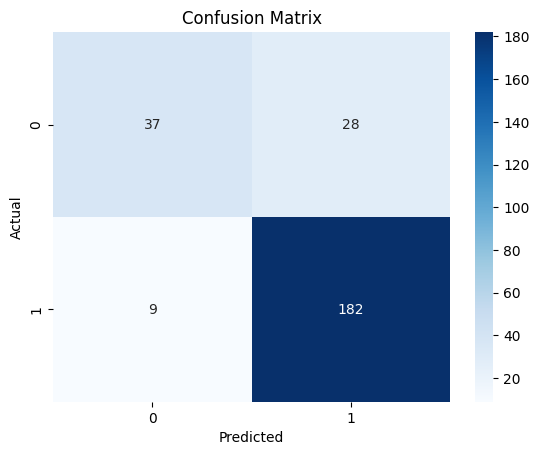

Explained variance ratio (first 3 components): [0.18756015 0.12677269 0.07084639]
Total explained variance ratio (200 components): 0.9798191487492363


In [77]:
# Apply PCA to reduce to 200 dimensions
pca = PCA(n_components=200)  # 200-dimensional PCA
X_pca = pca.fit_transform(X_norm)

# Split the data: 500 records for training, the rest for testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, species, train_size=500, random_state=42, stratify=species)

# Verify the split
print(f"\nTraining set size: {X_train.shape[0]} records")
print(f"Test set size: {X_test.shape[0]} records")

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model using multiple metrics
print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Print explained variance to understand how much variance is captured
print("Explained variance ratio (first 3 components):", pca.explained_variance_ratio_[:3])
print("Total explained variance ratio (200 components):", sum(pca.explained_variance_ratio_))

### _(3) Lấy dữ liệu gốc và chia thành tập train:test như tỷ lệ trong ý 2, sau đó giảm chiều về 200 chiều cho cả hai tập bằng PCA và thực hiện lại bài toán phân lớp dữ liệu. So sánh độ chính xác với ý (2)._


Training set size: 500 records
Test set size: 256 records

Model Evaluation:
Accuracy Score: 0.61328125

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.05      0.06        65
           1       0.71      0.81      0.76       191

    accuracy                           0.61       256
   macro avg       0.39      0.43      0.41       256
weighted avg       0.55      0.61      0.58       256


Confusion Matrix:


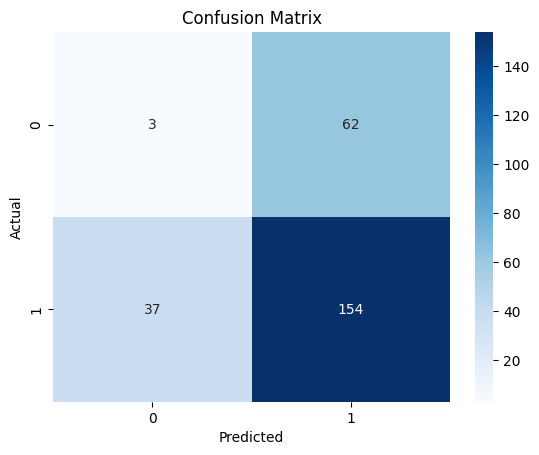


Explained variance ratio (first 3 components): [0.20130271 0.12364573 0.07126146]
Total explained variance ratio (200 components): 0.9970997389340254


In [83]:
# We're separating the class column
species = df["class"].tolist()
X = df.drop(columns=["class", "id"])  # Drop both 'class' and 'id' columns

# Standardize the data (using z-score standardization)
X = (X - X.mean()) / X.std(ddof=0)

# Normalize data (min-max normalization)
X_norm = (X - X.min()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = train_test_split(X_norm, species, train_size=500, random_state=42, stratify=species)

# Apply PCA to reduce to 200 dimensions
pca = PCA(n_components=200)  # 200-dimensional PCA
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

# Verify the split
print(f"\nTraining set size: {X_train.shape[0]} records")
print(f"Test set size: {X_test.shape[0]} records")

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model using multiple metrics
print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Print explained variance to understand how much variance is captured
print("\nExplained variance ratio (first 3 components):", pca.explained_variance_ratio_[:3])
print("Total explained variance ratio (200 components):", sum(pca.explained_variance_ratio_))

### _(4) Sử dụng phương pháp PCA để đưa dữ liệu về số chiều nhỏ nhất sao cho lượng thông tin được giữ lại ít nhất đạt 80%._


**_(i) Cho biết dữ liệu mới còn bao nhiêu chiều._**

In [79]:
import numpy as np

# --- Requirement (i): Find the smallest number of dimensions to retain at least 80% variance ---
# Apply PCA without specifying the number of components to get all components
pca = PCA()
X_pca_full = pca.fit_transform(X_norm)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the smallest number of components that retains at least 80% of the variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # +1 because argmax returns 0-based index
print(f"Number of dimensions to retain at least 80% variance: {n_components_80}")
print(f"Cumulative variance retained with {n_components_80} components: {cumulative_variance[n_components_80-1]:.4f}")

Number of dimensions to retain at least 80% variance: 34
Cumulative variance retained with 34 components: 0.8004


**_(ii) Thực hiện lại bài toán phân loại với tỷ lệ như trên, ứng với dữ liệu mới và so sánh độ chính xác._**


Training set size: 500 records
Test set size: 256 records

Model Evaluation (with new dimensionality):
Accuracy Score: 0.84375

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        65
           1       0.86      0.95      0.90       191

    accuracy                           0.84       256
   macro avg       0.82      0.74      0.77       256
weighted avg       0.84      0.84      0.83       256


Confusion Matrix:


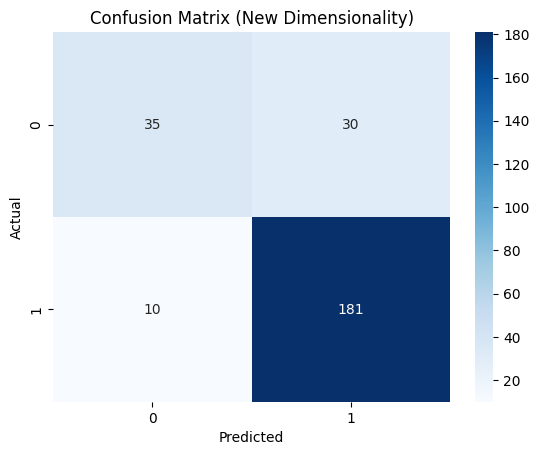


Comparison of Accuracies:
Accuracy with 34 components (80% variance): 0.8438
Accuracy with 200 components: 0.8594
Difference (new - 200 components): -0.0156


In [80]:
# --- Requirement (ii): Classification with the new dimensionality ---
# Apply PCA with the determined number of components
pca_80 = PCA(n_components=n_components_80)
X_pca_80 = pca_80.fit_transform(X_norm)

# Split the data: 500 records for training, the rest for testing
X_train, X_test, y_train, y_test = train_test_split(X_pca_80, species, train_size=500, random_state=42, stratify=species)

# Verify the split
print(f"\nTraining set size: {X_train.shape[0]} records")
print(f"Test set size: {X_test.shape[0]} records")

# Train a Logistic Regression model on the new reduced data
log_reg_80 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_80.fit(X_train, y_train)

# Predict on the test set
y_pred_80 = log_reg_80.predict(X_test)

# Evaluate the model
print("\nModel Evaluation (with new dimensionality):")
accuracy_80 = accuracy_score(y_test, y_pred_80)
print("Accuracy Score:", accuracy_80)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_80))
print("\nConfusion Matrix:")
conf_matrix_80 = confusion_matrix(y_test, y_pred_80)
sns.heatmap(conf_matrix_80, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (New Dimensionality)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- Compare with previous result (200 dimensions) ---
# Apply PCA with 200 components (from the previous task)
pca_200 = PCA(n_components=200)
X_pca_200 = pca_200.fit_transform(X_norm)

# Split the data (same split as before for fair comparison)
X_train_200, X_test_200, y_train_200, y_test_200 = train_test_split(X_pca_200, species, train_size=500, random_state=42, stratify=species)

# Train and evaluate Logistic Regression on 200 components
log_reg_200 = LogisticRegression(max_iter=1000, random_state=42)
log_reg_200.fit(X_train_200, y_train_200)
y_pred_200 = log_reg_200.predict(X_test_200)
accuracy_200 = accuracy_score(y_test_200, y_pred_200)

# Compare accuracies
print("\nComparison of Accuracies:")
print(f"Accuracy with {n_components_80} components (80% variance): {accuracy_80:.4f}")
print(f"Accuracy with 200 components: {accuracy_200:.4f}")
print(f"Difference (new - 200 components): {accuracy_80 - accuracy_200:.4f}")

### _(5) Sử dụng dữ liệu ban đầu, chia thành các tập Train- Test với tỷ lệ 1/3 là test, sau đó áp dụng phương pháp Naïve Bayes phù hợp và phương pháp Hồi quy Logistic để thực hiện bài toán phân loại (theo class). Tiếp theo lại thực nghiệm các mô hình nói trên với dữ liệu đã giảm chiều, cùng tỷ lệ chia như trên. Hãy đánh giá xem 2 mô hình này, mô hình nào có độ chính xác thay đổi nhiều hơn_

In [81]:
from sklearn.naive_bayes import GaussianNB  

y = df["class"].tolist()  # Renamed to 'y' for clarity (target variable)
X = df.drop(columns=["class", "id"])

# --- Step 1: Split and Evaluate on Original Data ---
# Split the data: 1/3 test (test_size=1/3), 2/3 train
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

# Verify the split
print(f"\nOriginal Data - Training set size: {X_train_orig.shape[0]} records")
print(f"Original Data - Test set size: {X_test_orig.shape[0]} records")

# Naïve Bayes (GaussianNB, since features are continuous)
nb_orig = GaussianNB()
nb_orig.fit(X_train_orig, y_train_orig)
y_pred_nb_orig = nb_orig.predict(X_test_orig)
accuracy_nb_orig = accuracy_score(y_test_orig, y_pred_nb_orig)

# Logistic Regression
lr_orig = LogisticRegression(max_iter=1000, random_state=42)
lr_orig.fit(X_train_orig, y_train_orig)
y_pred_lr_orig = lr_orig.predict(X_test_orig)
accuracy_lr_orig = accuracy_score(y_test_orig, y_pred_lr_orig)

# Print accuracies for original data
print("\nAccuracies on Original Data:")
print(f"- Naïve Bayes (GaussianNB) Accuracy: {accuracy_nb_orig:.4f}")
print(f"- Logistic Regression Accuracy: {accuracy_lr_orig:.4f}")


Original Data - Training set size: 504 records
Original Data - Test set size: 252 records

Accuracies on Original Data:
- Naïve Bayes (GaussianNB) Accuracy: 0.7659
- Logistic Regression Accuracy: 0.7619


In [82]:
# --- Step 2: Dimensionality Reduction ---
# Standardize the data (already done in your code)
X = (X - X.mean()) / X.std(ddof=0)

# Normalize data (min-max normalization, as per your code)
X_norm = (X - X.min()) / (X.max() - X.min())

# Apply PCA to reduce dimensionality (retain 80% variance, as in previous task)
pca = PCA()
X_pca_full = pca.fit_transform(X_norm)

# Find the number of components to retain at least 80% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of dimensions to retain at least 80% variance: {n_components_80}")

# Apply PCA with the determined number of components
pca_80 = PCA(n_components=n_components_80)
X_pca = pca_80.fit_transform(X_norm)

# --- Step 3: Split and Evaluate on Reduced-Dimensionality Data ---
# Split the reduced data: 1/3 test, 2/3 train
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=1/3, random_state=42, stratify=y
)

# Verify the split
print(f"Reduced Data - Training set size: {X_train_pca.shape[0]} records")
print(f"Reduced Data - Test set size: {X_test_pca.shape[0]} records")

# Naïve Bayes on reduced data
nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train_pca)
y_pred_nb_pca = nb_pca.predict(X_test_pca)
accuracy_nb_pca = accuracy_score(y_test_pca, y_pred_nb_pca)

# Logistic Regression on reduced data
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
accuracy_lr_pca = accuracy_score(y_test_pca, y_pred_lr_pca)

# Print accuracies for reduced data
print("\nAccuracies on Reduced-Dimensionality Data:")
print(f"- Naïve Bayes (GaussianNB) Accuracy: {accuracy_nb_pca:.4f}")
print(f"- Logistic Regression Accuracy: {accuracy_lr_pca:.4f}")

# --- Step 4: Compare Accuracy Changes ---
# Calculate the change in accuracy for each model
change_nb = accuracy_nb_pca - accuracy_nb_orig
change_lr = accuracy_lr_pca - accuracy_lr_orig

print("\nAccuracy Changes After Dimensionality Reduction:")
print(f"- Naïve Bayes Change: {change_nb:.4f}")
print(f"- Logistic Regression Change: {change_lr:.4f}")

# Determine which model has the larger change in accuracy
if abs(change_nb) > abs(change_lr):
    print("Naïve Bayes has the larger change in accuracy.")
else:
    print("Logistic Regression has the larger change in accuracy.")

# Optional: Detailed evaluation for reduced data (e.g., classification report)
print("\nDetailed Evaluation for Reduced-Dimensionality Data:")
print("Naïve Bayes Classification Report:")
print(classification_report(y_test_pca, y_pred_nb_pca))
print("Logistic Regression Classification Report:")
print(classification_report(y_test_pca, y_pred_lr_pca))

Number of dimensions to retain at least 80% variance: 34
Reduced Data - Training set size: 504 records
Reduced Data - Test set size: 252 records

Accuracies on Reduced-Dimensionality Data:
- Naïve Bayes (GaussianNB) Accuracy: 0.7738
- Logistic Regression Accuracy: 0.8413

Accuracy Changes After Dimensionality Reduction:
- Naïve Bayes Change: 0.0079
- Logistic Regression Change: 0.0794
Logistic Regression has the larger change in accuracy.

Detailed Evaluation for Reduced-Dimensionality Data:
Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.41      0.48        64
           1       0.82      0.90      0.86       188

    accuracy                           0.77       252
   macro avg       0.70      0.65      0.67       252
weighted avg       0.76      0.77      0.76       252

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63

## Ví dụ 3 (Bài tập tự thực hành 2):

In [33]:
# Import các thư viện cần thiếtthiết
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# In ra số lượng các mẫu ứng vối mỗi class
df = pd.read_csv("vidu4_lin_reg.txt", sep='\s+')
print(df.head())

   ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0   1    56   21  160     14.0         6.00      1.95
1   2    76   18  150     12.0         4.97      1.33
2   3    63   16  160      4.4         6.39      0.83
3   4    78   20  100      4.0         7.00      2.00
4   5    87   20  110      4.6         4.10      1.30


In [17]:
# 2. Bài toán Hồi quy tuyến tính với dữ liệu gốc
# Tách biến độc lập (X) và biến phụ thuộc (y)
X = df[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']]
y = df['BEDAYNTM']

model = LinearRegression()
model.fit(X, y)

# Dự đoán và tính R^2
y_pred = model.predict(X)
r2_original = r2_score(y, y_pred)

print("Hệ số hồi quy (β): ", model.coef_)
print("Hệ số chặn (β0):", model.intercept_)
print("R^2 của mô hình gốc:", r2_original)
print(f"=> Mô hình dự đoán được {round(r2_original*100,2)}% dữ liệu thực")

Hệ số hồi quy (β):  [ 0.00994694 -0.00020655  0.00218137  0.0076701   0.03847025]
Hệ số chặn (β0): -0.10802908119386911
R^2 của mô hình gốc: 0.20851975239522702
=> Mô hình dự đoán được 20.85% dữ liệu thực


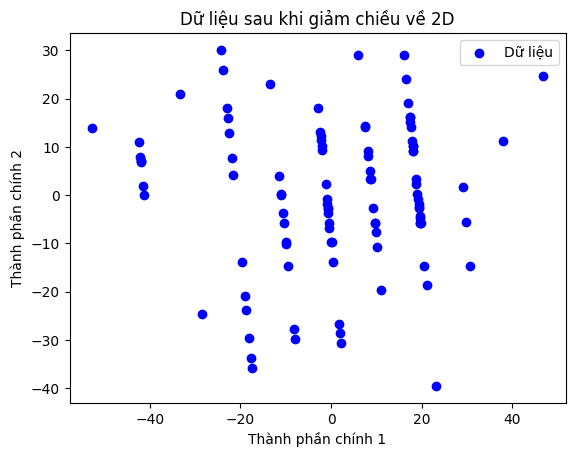

Tỷ lệ phương sai giải thích: [0.60409676 0.3499975 ]


In [21]:
# 3. Giảm chiều dữ liệu về 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tạo DataFrame cho dữ liệu đã giảm chiều
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Hiển thị trực quan
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', label='Dữ liệu')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Dữ liệu sau khi giảm chiều về 2D')
plt.legend()
plt.show()

print("Tỷ lệ phương sai giải thích:", pca.explained_variance_ratio_)

In [23]:
# 4. Thực hiện Hồi quy tuyến tính với dữ liệu mới

# Huấn luyện mô hình hồi quy tuyến tính với dữ liệu PCA
model_pca = LinearRegression()
model_pca.fit(X_pca, y)

# Dự đoán và tính R^2
y_pred_pca = model_pca.predict(X_pca)
r2_pca = r2_score(y, y_pred_pca)

print("Hệ số hồi quy (β): ", model_pca.coef_)
print("Hệ số chặn (β0):", model_pca.intercept_)
print("R^2 của mô hình gốc:", r2_pca)
print(f"=> Mô hình dự đoán được {round(r2_pca*100,2)}% dữ liệu thực")

Hệ số hồi quy (β):  [0.00146871 0.01103925]
Hệ số chặn (β0): 1.0709999999999997
R^2 của mô hình gốc: 0.1843144889780728
=> Mô hình dự đoán được 18.43% dữ liệu thực


In [25]:
# 5. So sánh kết quả với trường hợp dữ liệu nguyên bản

print("So sánh kết quả:")
print(f"R^2 của mô hình gốc (5 chiều): {r2_original:.4f}")
print(f"R^2 của mô hình PCA (2 chiều): {r2_pca:.4f}")
print(f"Chênh lệch R^2: {r2_original - r2_pca:.4f}")

if r2_original > r2_pca:
    print("=> Mô hình gốc tốt hơn mô hình PCA.")
else:
    print("=> Mô hình PCA tốt hơn hoặc tương đương mô hình gốc.")

So sánh kết quả:
R^2 của mô hình gốc (5 chiều): 0.2085
R^2 của mô hình PCA (2 chiều): 0.1843
Chênh lệch R^2: 0.0242
=> Mô hình gốc tốt hơn mô hình PCA.


## Ví dụ 4 (Bài tập tự thực hành 3):

In [26]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = 'handwritting'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

### (1) Đọc dữ liệu ảnh, lấy tập dữ liệu 5000 ảnh bất kỳ; giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu).

In [28]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

# Gọi phương thức đọc dữ liệu
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

print("Kích thước ban đầu:")
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Kích thước ban đầu:
Train images shape: (5000, 784)
Train labels shape: (5000,)
Test images shape: (10000, 784)
Test labels shape: (10000,)


In [ ]:
# Giảm chiều dữ liệu xuống 100 chiều bằng PCA
pca = PCA(n_components=100)
train_images_pca = pca.fit_transform(train_images)  # Fit và transform trên tập train
test_images_pca = pca.transform(test_images)       # Chỉ transform trên tập test

# In kích thước sau khi giảm chiều
print("\nKích thước sau khi giảm chiều xuống 100:")
print("Train images PCA shape:", train_images_pca.shape)
print("Test images PCA shape:", test_images_pca.shape)

# In tỷ lệ phương sai giải thích
print("\nTỷ lệ phương sai giải thích bởi 100 thành phần chính:")
print(pca.explained_variance_ratio_)
print(f"Tổng tỷ lệ phương sai giải thích: {round(sum(pca.explained_variance_ratio_)*100,2)}%")


Kích thước sau khi giảm chiều xuống 100:
Train images PCA shape: (5000, 100)
Test images PCA shape: (10000, 100)

Tỷ lệ phương sai giải thích bởi 100 thành phần chính:
[0.09483816 0.07110907 0.06366062 0.05409651 0.04890448 0.04404584
 0.03192887 0.02892522 0.02769623 0.02429395 0.0207229  0.01930677
 0.01732627 0.01685703 0.0156033  0.01531112 0.01335333 0.01279453
 0.01209001 0.01166516 0.01052905 0.01027651 0.00960073 0.00943496
 0.00898231 0.00846948 0.00806618 0.00776604 0.00755661 0.0070379
 0.00658826 0.00649376 0.00618854 0.00590318 0.0056783  0.00550393
 0.00512585 0.00490389 0.00474023 0.00469702 0.00464907 0.00433464
 0.00416461 0.00401283 0.00393124 0.00375016 0.00370707 0.00358667
 0.00341578 0.00327383 0.00316428 0.00304511 0.00300621 0.00291268
 0.00287971 0.00271482 0.00266449 0.00264659 0.00255667 0.00251508
 0.00243991 0.00237369 0.00232442 0.00223911 0.00218012 0.00214879
 0.00202108 0.00196369 0.0019288  0.00189875 0.00185081 0.00182781
 0.00177195 0.00173163 0.001

### (2) Áp dụng phương pháp phân loại nhiều lớp Multinomial Logistic Regression (tỷ lệ train:validation là 0.7:0.3).

#### (a) Dữ liệu nguyên bản (giữ nguyên 28x28 = 784 chiều)


Confusion Matrix:


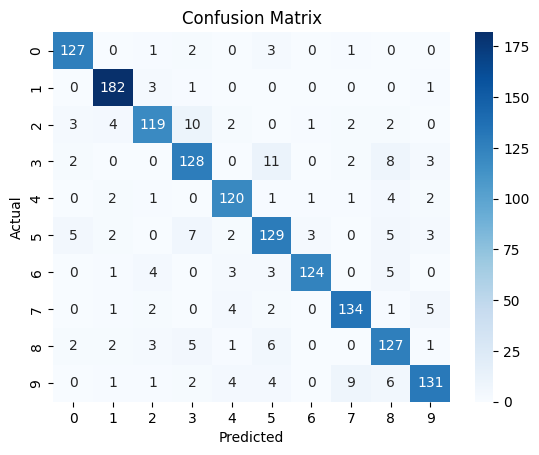

Độ chính xác trên tập train (original): 1.0000
Độ chính xác trên tập validation (original): 0.8807


In [41]:
# Chia tập train/validation với tỷ lệ 0.7:0.3
X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(
    train_images, train_labels, train_size=0.7, random_state=42
)

# Huấn luyện Multinomial Logistic Regression
model_orig = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
model_orig.fit(X_train_orig, y_train_orig)

# Dự đoán và đánh giá
y_pred_train_orig = model_orig.predict(X_train_orig)
y_pred_val_orig = model_orig.predict(X_val_orig)
acc_train_orig = accuracy_score(y_train_orig, y_pred_train_orig)
acc_val_orig = accuracy_score(y_val_orig, y_pred_val_orig)

# Evaluate the model using multiple metrics
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val_orig, y_pred_val_orig)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Độ chính xác trên tập train (original): {acc_train_orig:.4f}")
print(f"Độ chính xác trên tập validation (original): {acc_val_orig:.4f}")

#### (b) Dữ liệu đã qua giảm chiều (100 chiều) theo 02 cách: Giảm chiều toàn tập ảnh sau đó chia train:test – chia train:test rồi mới giảm chiều. So sánh và cho biết cách nào phù hợp hơn.

Cách 1: Giảm chiều toàn bộ tập ảnh sau đó chia train/validation


Confusion Matrix:


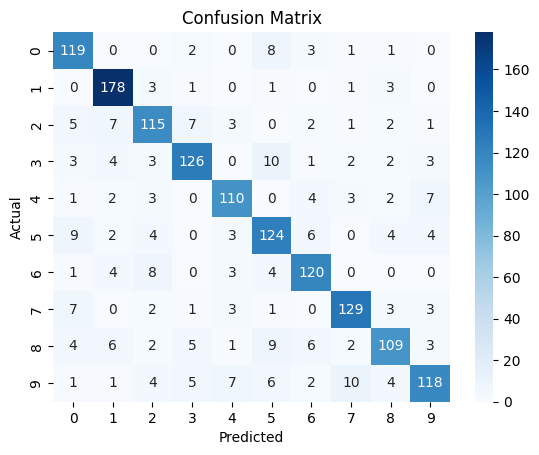

Độ chính xác trên tập train (PCA full): 1.0000
Độ chính xác trên tập validation (PCA full): 0.8320
Tổng tỷ lệ phương sai giải thích (PCA full): 0.9176


In [40]:
pca_full = PCA(n_components=100)
all_images = np.vstack((train_images, test_images))  # Gộp train và test để giảm chiều
all_images_pca = pca_full.fit_transform(all_images)

# Tách lại train và test sau khi giảm chiều
train_images_pca_full = all_images_pca[:5000, :]
test_images_pca_full = all_images_pca[5000:, :]

# Chia tập train/validation
X_train_pca1, X_val_pca1, y_train_pca1, y_val_pca1 = train_test_split(
    train_images_pca_full, train_labels, train_size=0.7, random_state=42
)

# Huấn luyện và đánh giá
model_pca1 = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
model_pca1.fit(X_train_pca1, y_train_pca1)

y_pred_train_pca1 = model_pca1.predict(X_train_pca1)
y_pred_val_pca1 = model_pca1.predict(X_val_pca1)
acc_train_pca1 = accuracy_score(y_train_pca1, y_pred_train_pca1)
acc_val_pca1 = accuracy_score(y_val_pca1, y_pred_val_pca1)

# Evaluate the model using multiple metrics
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val_pca1, y_pred_val_pca1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Độ chính xác trên tập train (PCA full): {acc_train_pca1:.4f}")
print(f"Độ chính xác trên tập validation (PCA full): {acc_val_pca1:.4f}")
print(f"Tổng tỷ lệ phương sai giải thích (PCA full): {sum(pca_full.explained_variance_ratio_):.4f}")

Cách 2: Chia train/validation rồi mới giảm chiều


Confusion Matrix:


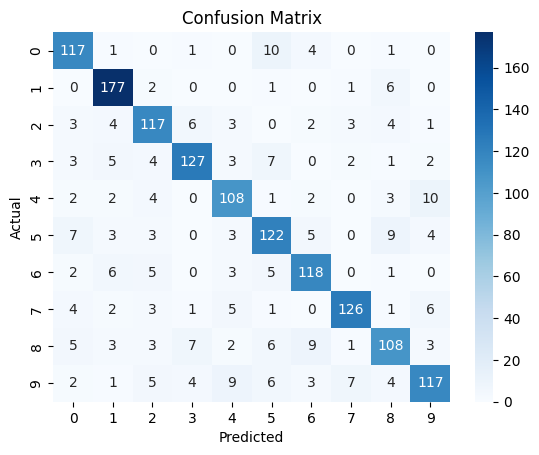

Độ chính xác trên tập train (PCA split): 0.9926
Độ chính xác trên tập validation (PCA split): 0.8247
Tổng tỷ lệ phương sai giải thích (PCA split): 0.9179


In [39]:
# Chia tập train/validation trước
X_train_orig2, X_val_orig2, y_train_orig2, y_val_orig2 = train_test_split(
    train_images, train_labels, train_size=0.7, random_state=42
)

# Giảm chiều riêng trên tập train
pca_train = PCA(n_components=100)
X_train_pca2 = pca_train.fit_transform(X_train_orig2)
X_val_pca2 = pca_train.transform(X_val_orig2)  # Chỉ transform trên validation

# Huấn luyện và đánh giá
model_pca2 = LogisticRegression(multi_class='multinomial', max_iter=1000, solver='lbfgs')
model_pca2.fit(X_train_pca2, y_train_orig2)

y_pred_train_pca2 = model_pca2.predict(X_train_pca2)
y_pred_val_pca2 = model_pca2.predict(X_val_pca2)
acc_train_pca2 = accuracy_score(y_train_orig2, y_pred_train_pca2)
acc_val_pca2 = accuracy_score(y_val_orig2, y_pred_val_pca2)

# Evaluate the model using multiple metrics
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_val_orig2, y_pred_val_pca2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Độ chính xác trên tập train (PCA split): {acc_train_pca2:.4f}")
print(f"Độ chính xác trên tập validation (PCA split): {acc_val_pca2:.4f}")
print(f"Tổng tỷ lệ phương sai giải thích (PCA split): {sum(pca_train.explained_variance_ratio_):.4f}")

**_So sánh kết quả_**

In [ ]:
print(f"(a) Original (784 chiều) - Validation Accuracy: {acc_val_orig:.4f}")
print(f"(b1) PCA full (100 chiều) - Validation Accuracy: {acc_val_pca1:.4f}")
print(f"(b2) PCA split (100 chiều) - Validation Accuracy: {acc_val_pca2:.4f}")


(a) Original (784 chiều) - Validation Accuracy: 0.8807
(b1) PCA full (100 chiều) - Validation Accuracy: 0.8320
(b2) PCA split (100 chiều) - Validation Accuracy: 0.8187
